# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [128]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [156]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6]

In [157]:
# 計算並繪製輪廓分析的結果


In [186]:
for i,c in enumerate(centers):
    print(c)

[5.37058824 3.8        1.51764706 0.27647059]
[6.56818182 3.08636364 5.53636364 2.16363636]
[5.62272727 2.70909091 4.11818182 1.28636364]
[7.475 3.125 6.3   2.05 ]
[4.81818182 3.23636364 1.43333333 0.23030303]
[5.2        2.36666667 3.38333333 1.01666667]
[6.03684211 2.70526316 5.         1.77894737]
[6.44210526 2.97894737 4.59473684 1.43157895]


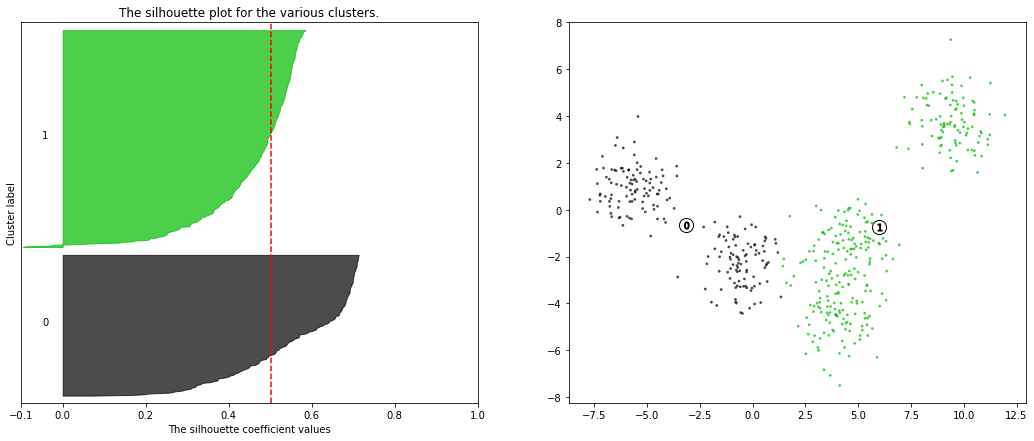

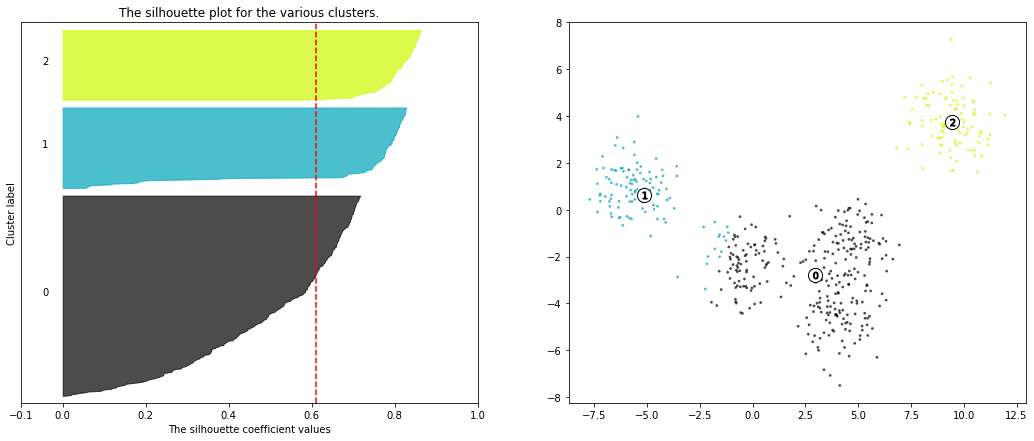

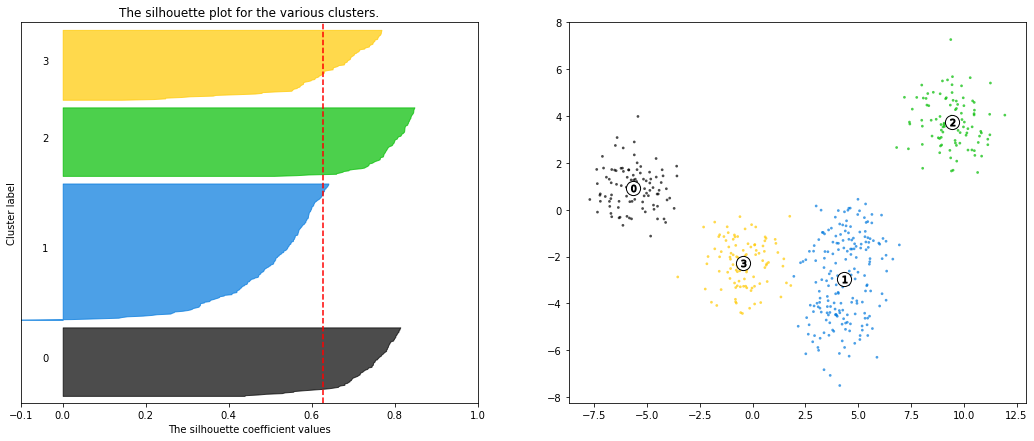

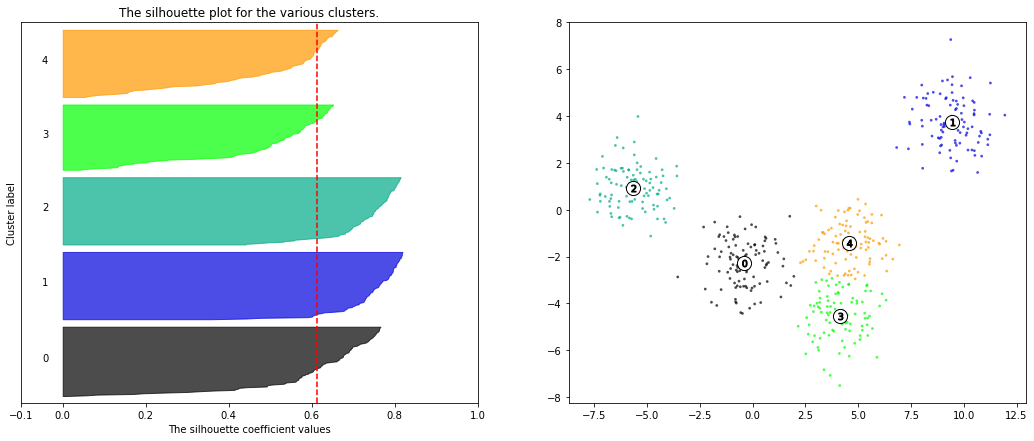

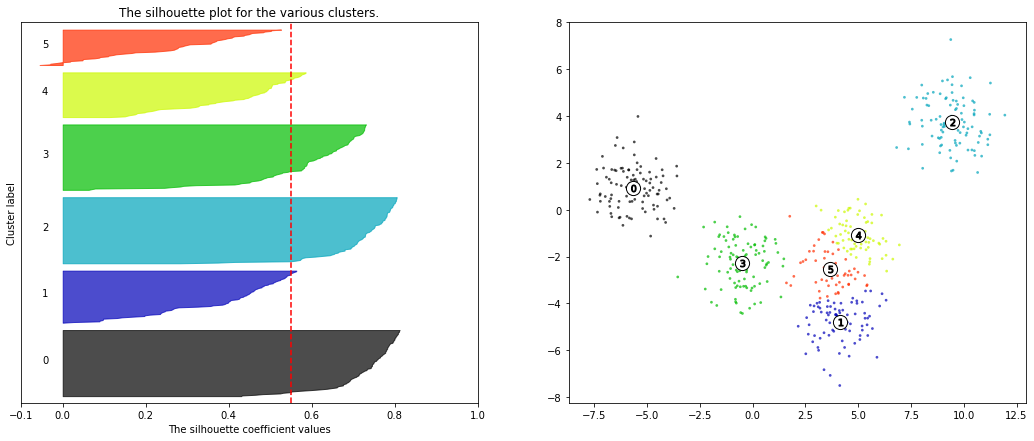

In [190]:
for n_clusters in range_n_clusters:
    fig,(ax1,ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)

    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(n_clusters+1)*10])    
    
    cluster=KMeans(n_clusters=n_clusters,random_state=10)
    cluster_label=cluster.fit_predict(X)
    
    silhouette_avg=silhouette_score(X,cluster_label)
    #print(n_clusters,silhouette_avg)
    silhouette_samples_values=silhouette_samples(X,cluster_label)
        
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=silhouette_samples_values[cluster_label==i]
        
        ith_cluster_silhouette_values.sort()
        
        size=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size
        color=cm.nipy_spectral(float(i)/n_clusters)
        #print(color)
        
        ax1.fill_betweenx(np.arange(y_lower,y_upper),
                          0,ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size, str(i))
        y_lower=y_upper+10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1.0])
    
    color=cm.nipy_spectral(cluster_label.astype(float)/n_clusters)
    ax2.scatter(X[:,0],X[:,1],marker='.',color=color,s=30,lw=0,alpha=0.7,edgecolor='k')
    
    
    
    ax2.scatter(cluster.cluster_centers_[:,0],
                cluster.cluster_centers_[:,1],
                marker='o',c='white',alpha=1,
               s=200,edgecolor='k')
    for i,c in enumerate(cluster.cluster_centers_):
        ax2.scatter(c[0],c[1],marker='$%d$'% i,
                   alpha=1,
                   s=50,
                   edgecolor='k')
plt.show()